In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras import backend as K
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
from joblib import dump, load

In [2]:
data = pd.read_csv("C:\\Users\\hp\\Desktop\\University\\CMPE 460\\Project_deep\\cars.csv",encoding='iso-8859-1')

In [3]:
# drop rows where the price is less than 500
data = data[data['price'] >= 500]

In [4]:
def check_missing_values(dataframe):
    missing_values = dataframe.isnull().any()
    if missing_values.any():
        print("Missing values in columns:")
        print(missing_values[missing_values==True])
    else:
        print("No missing values.")

check_missing_values(data)
# data # Preview data

No missing values.


In [5]:
if 'Manufacturer' in data.columns:
    data = data.drop('Manufacturer', axis=1)
else:
    print("Manufacturer column not found")

if 'Model ' in data.columns:
    data = data.drop('Model ', axis=1)
else:
    print("Model  column not found")

# data # Preview data
# print(data)

In [6]:
# Define the list of non numeric columns
categorical_cols = ['symboling', 'Fuel type', 'aspiration', 'doornumber', 'Category', 'Drive wheels', 'enginelocation', 'enginetype', 'Cylinders', 'fuelsystem']

def one_hot_encoding(data, categorical_cols):
    # Create the main array with car_ID column
    main_array = np.array(data['car_ID']).reshape(-1,1)
    # Iterate through columns in the dataframe
    for col in data.columns:
        # Check if the column is in the list of categorical columns
        if col in categorical_cols:
            # Perform one-hot encoding on the column
            temp = np.array(pd.get_dummies(data[col]))
        else:
            # Otherwise, reshape the column
            temp = np.array(data[col]).reshape(-1,1)
        # Stack the column with the main array    
        main_array = np.hstack((main_array, temp))
    # Remove the car_ID column    
    main_array = main_array[:, 2:]
    # Return main_array
    return main_array

main_array = one_hot_encoding(data, categorical_cols)
# Display the array as a dataframe
# pd.DataFrame(main_array)

In [7]:
# Define the features and labels
X = main_array[:, :-1]
y = main_array[:, -1].reshape(-1, 1)

In [8]:
# Function to check for numeric values
def check_numeric_values(X):
    for i, val in enumerate(X):
        for j, value in enumerate(val):
            if isinstance(value, str):
                print("string value found in X at index [{}, {}]: {}".format(i, j, value))

check_numeric_values(X)

In [9]:
xScaler = StandardScaler()
yScaler = StandardScaler()

X_scaled = xScaler.fit_transform(X)
Y_scaled = yScaler.fit_transform(y)

In [10]:
# print("Shape of X_data: {}".format(X.shape))
# print("Shape of y_data: {}".format(y.shape))
# print("==========X_data after rescaling===============")
# print(pd.DataFrame(X_scaled).head())
# print("==========y_data after rescaling===============")
# print(Y_scaled.ravel())

In [11]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_scaled, test_size=0.1, random_state=42)
# Split validation set from the training set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# print("Shape of X_train: {}".format(X_train.shape))
# print("Shape of X_test: {}".format(X_test.shape))
# print("Shape of y_train: {}".format(y_train.shape))
# print("Shape of y_test: {}".format(y_test.shape))

In [13]:
# Building NN 
model = Sequential()
model.add(Dense(57, activation='relu', input_shape=(None, 57)))
model.add(Dense(29, activation='relu'))
model.add(Dense(14, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, None, 57)          3306      
                                                                 
 dense_1 (Dense)             (None, None, 29)          1682      
                                                                 
 dense_2 (Dense)             (None, None, 14)          420       
                                                                 
 dense_3 (Dense)             (None, None, 1)           15        
                                                                 
Total params: 5,423
Trainable params: 5,423
Non-trainable params: 0
_________________________________________________________________


In [14]:
NN = model.fit(x=X_train, y=y_train, epochs=85, validation_data=(X_val, y_val), verbose=0)

In [15]:
# print(NN.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


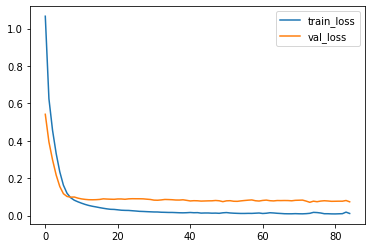

In [16]:
# Plotting validation loss and train loss
plt.plot(NN.history['loss'], label="train_loss")
plt.plot(NN.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

In [17]:
# Evalutation of model accuracy 
print("-------------------------------------------------------------------------------------------")
print("-------------------------------------------------------------------------------------------")

print(model.evaluate(X_test, y_test))

print("-------------------------------------------------------------------------------------------")
print("-------------------------------------------------------------------------------------------")

-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 26ms/step - loss: 0.1287 - mae: 0.2661
[0.12874862551689148, 0.2660987079143524]
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------


In [ ]:
import h5py
model.save('my_model_22.h5')

In [ ]:
joblib.dump(xScaler, "xScaler22.pkl")
joblib.dump(yScaler, "yScaler22.pkl")

# Code by: Mohammed G. Nasseir, Mohammad Hamed.
# ID: 119200029, 120200155